In [1]:
import numpy as np
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from src.preprocess.functions import get_downstream_counts_object, get_upstream_counts_object

downstream_counts = get_downstream_counts_object()
upstream_counts = get_upstream_counts_object()

In [3]:
len(downstream_counts)

20160

In [4]:
from src.preprocess.functions import get_attribute_probabilities, get_seasonality, get_all_call_counts

all_seasonality = get_seasonality()
downstream_probs = get_attribute_probabilities(all_seasonality)

In [5]:
from src.preprocess.functions import sample_downstream_microservices

#sampled_microservices = sample_downstream_microservices(downstream_probs, n=10)
sampled_microservices = ['MS_3351', 'MS_9570', 'MS_23689', 'MS_18330']

In [6]:
from src.preprocess.functions import get_microservice_workload

workloads_for_sampled_microservices = [
    get_microservice_workload(downstream_counts, sampled_microservice) 
    for sampled_microservice in sampled_microservices
]

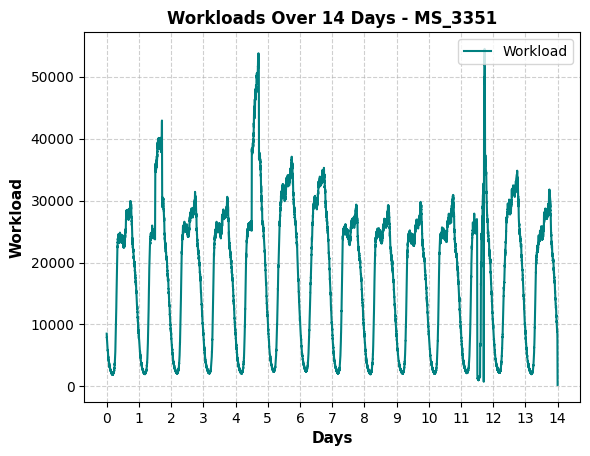

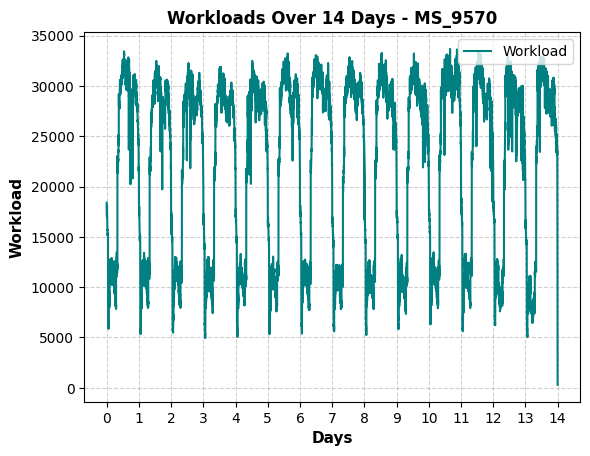

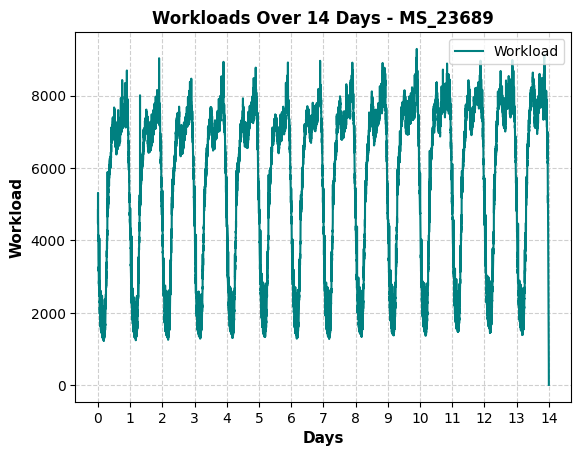

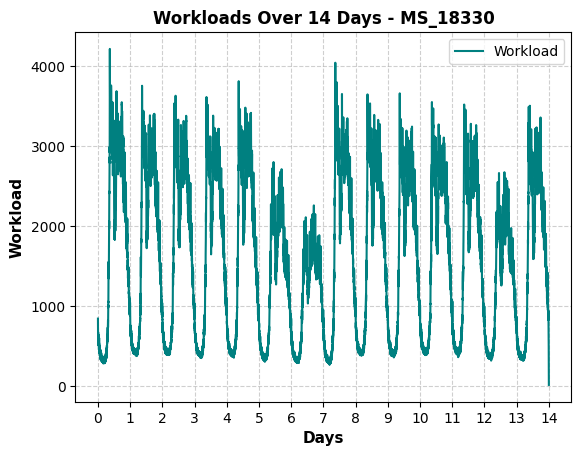

In [7]:
from src.plot import plot_microservice_workload

for i in range(len(workloads_for_sampled_microservices)):
    sampled_microservice = sampled_microservices[i]
    workloads_for_sampled_microservice = workloads_for_sampled_microservices[i]
    plot_microservice_workload(
        sampled_microservice, 
        workloads_for_sampled_microservice,
        f"../plots/workloads/workload_{i}.png"
    )

In [8]:
import os
import pickle

def get_k_neighbor_sets(node, k):
    i_node_set = set()
    u_node_set = set()
    
    def get_nested_k_neighbor_sets(graph, current_node, current_k, node_set):
        if current_k == 0:
            return
        
        node_set.add(current_node)
        
        neighbors = graph.get(current_node, {})
        for neighbor, _ in neighbors.items():
            get_nested_k_neighbor_sets(graph, neighbor, current_k - 1, node_set)
    
    with open(os.path.join(os.getenv('AGGREGATED_STATS_DIR'), 'downstream_graph.pickle'), 'rb') as file:
        downstream_graph = pickle.load(file)
    
    with open(os.path.join(os.getenv('AGGREGATED_STATS_DIR'), 'upstream_graph.pickle'), 'rb') as file:
        upstream_graph = pickle.load(file)
        
    get_nested_k_neighbor_sets(downstream_graph, node, k, i_node_set)
    get_nested_k_neighbor_sets(upstream_graph, node, k, u_node_set)
    return i_node_set, u_node_set

In [9]:
from src.preprocess.functions import get_node_label_encoder

label_encoder = get_node_label_encoder()
labels = label_encoder.transform(['MS_3351', 'MS_9570', 'MS_23689', 'MS_18330'])

In [10]:
labels

array([23998, 66470, 14085,  8672])

In [11]:
i_set_1, u_set_1 = get_k_neighbor_sets(23998, 3)

In [12]:
len(i_set_1), len(u_set_1), len(i_set_1 | u_set_1)

(78, 2, 78)

In [13]:
i_set_2, u_set_2 = get_k_neighbor_sets(66470, 3)

In [14]:
len(i_set_2), len(u_set_2), len(i_set_2 | u_set_2)

(428, 2, 428)

In [15]:
i_set_3, u_set_3 = get_k_neighbor_sets(14085, 3)

In [16]:
len(i_set_3), len(u_set_3), len(i_set_3 | u_set_3)

(4, 4, 4)

In [17]:
i_set_4, u_set_4 = get_k_neighbor_sets(8672, 3)
len(i_set_4), len(u_set_4), len(i_set_4 | u_set_4)

(566, 320, 774)

In [18]:
total_set = i_set_1 | u_set_1 | i_set_2 | u_set_2 | i_set_3 | u_set_3 | i_set_4 | u_set_4

In [19]:
len(total_set)

1271

In [20]:
import pandas as pd

combined_set = set()

for i in range(20160):
    df = pd.read_parquet(f'/Users/ashfaq/Documents/traces/filtered_data_files_1/data_{i}.parquet')
    u_set = set(df['u'])
    i_set = set(df['i'])
    combined_set = combined_set | u_set | i_set
    
combined_list = list(combined_set)
len(combined_list)

78

In [21]:
from src.preprocess.functions import get_total_interactions

get_total_interactions('/Users/ashfaq/Documents/traces/data_stats_aggregated_2/filtered_counts.pickle')

3115070694

In [22]:
from src.preprocess.functions import get_filtered_node_label_encoder

label_encoder = get_filtered_node_label_encoder()

In [23]:
label_encoder.classes_

array(['MS_10633', 'MS_1130', 'MS_15131', 'MS_15658', 'MS_17155',
       'MS_17800', 'MS_17890', 'MS_17981', 'MS_18961', 'MS_19321',
       'MS_19790', 'MS_20628', 'MS_20683', 'MS_2087', 'MS_2184',
       'MS_23014', 'MS_23823', 'MS_24646', 'MS_25006', 'MS_28527',
       'MS_28680', 'MS_29209', 'MS_30660', 'MS_31493', 'MS_324',
       'MS_3351', 'MS_33624', 'MS_34217', 'MS_35557', 'MS_35561',
       'MS_37671', 'MS_3804', 'MS_39564', 'MS_40415', 'MS_40515',
       'MS_43781', 'MS_45054', 'MS_46329', 'MS_46534', 'MS_46544',
       'MS_46839', 'MS_47528', 'MS_47698', 'MS_47909', 'MS_48027',
       'MS_48157', 'MS_48428', 'MS_49216', 'MS_4990', 'MS_52345',
       'MS_52423', 'MS_52993', 'MS_53267', 'MS_54890', 'MS_5716',
       'MS_57724', 'MS_57805', 'MS_57979', 'MS_60780', 'MS_61076',
       'MS_66896', 'MS_68025', 'MS_68038', 'MS_69175', 'MS_70581',
       'MS_71034', 'MS_71842', 'MS_71843', 'MS_72499', 'MS_73015',
       'MS_73107', 'MS_745', 'MS_7813', 'MS_9444', 'MS_984',
       'UN

In [24]:
label_encoder.transform(['MS_3351'])

array([25])